# Image processing

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

## Image representation

Images can be represented by matrices, and each pixel can be represented by a 3-dimensional vector (for example, red/green/blue intensities), or sometimes by a 4 dimensional vector including transparency.

The following downloads an image from a webpage.

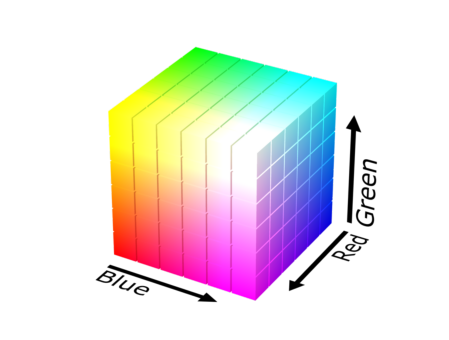

Image size: (600, 800, 4)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

rgb_cube = plt.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/800px-RGB_color_solid_cube.png')

plt.figure(figsize=(8,6))
plt.imshow(rgb_cube)
plt.axis('off')
plt.show()

print(f'Image size: {rgb_cube.shape}')
# The image created by By SharkD 
# Own work Source-code available at the POV-Ray Object Collection., 
# CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=3375025

The image is $600\times 800$ and each pixel is represented by a 4 dimensional vector, that is, reds, greens, blues, and transparency.

Each channel can be separately shown below.

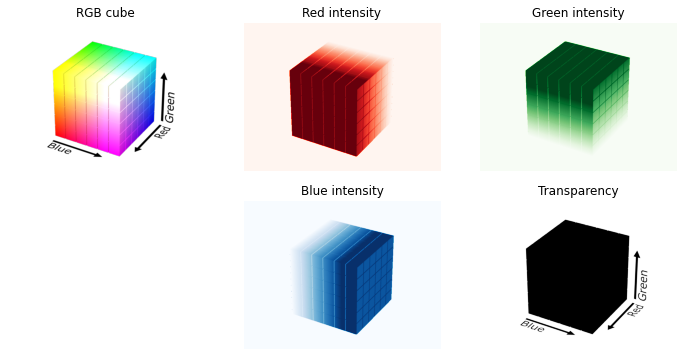

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.imshow(rgb_cube)
plt.title('RGB cube')
plt.axis('off')
plt.subplot(232)
plt.imshow(rgb_cube[:,:,0], cmap='Reds')
plt.title('Red intensity')
plt.axis('off')
plt.subplot(233)
plt.imshow(rgb_cube[:,:,1], cmap='Greens')
plt.title('Green intensity')
plt.axis('off')
plt.subplot(235)
plt.imshow(rgb_cube[:,:,2], cmap='Blues')
plt.title('Blue intensity')
plt.axis('off')
plt.subplot(236)
plt.imshow(rgb_cube[:,:,3], cmap='Greys')
plt.title('Transparency')
plt.axis('off')
plt.show()

The pixel colors can also be represented  by HSV model, where each dimension stands for Hue, Saturation, and Value. The HSV representation models the way paints of different colors mix together, with the saturation dimension resembling various shades of brightly colored paint, and the value dimension resembling the mixture of those paints with varying amounts of black or white paint. The HSL model is known to resemble more perceptual color models.

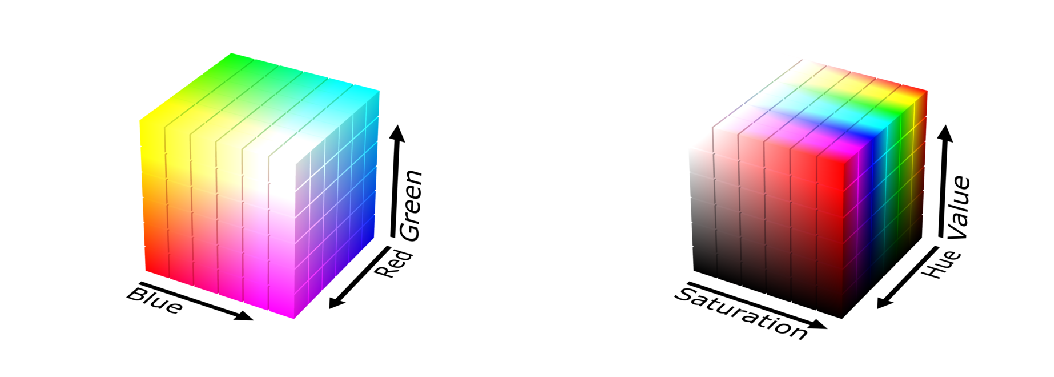

In [0]:
hsv_cube = plt.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/HSV_color_solid_cube.png/800px-HSV_color_solid_cube.png')
# The image created by By SharkD 
# Own work Source-code available at the POV-Ray Object Collection., 
# CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=8401623

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(rgb_cube)
plt.axis('off')
plt.subplot(122)
plt.imshow(hsv_cube)
plt.axis('off')
plt.show()

## Grayscale image

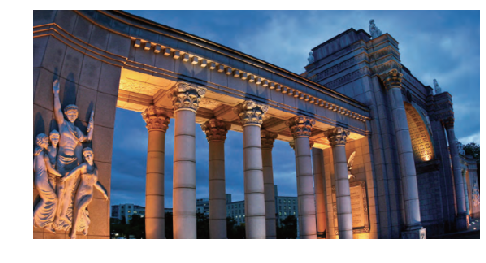

In [0]:
khu = plt.imread('https://jonghank.github.io/ee370/files/khu_entrance.png')

plt.figure(figsize=(8,6))
plt.imshow(khu)
plt.axis('off')
plt.show()

The following transforms the original color image to a grayscale one. An easy way to generate a grayscale image from RGB channels is, for each pixel assigning,

$$
X = 0.299 R + 0.587 G + 0.114 B 
$$

Equal weights can be simply used. Or other weights, or even negative weights can be used for special effects.

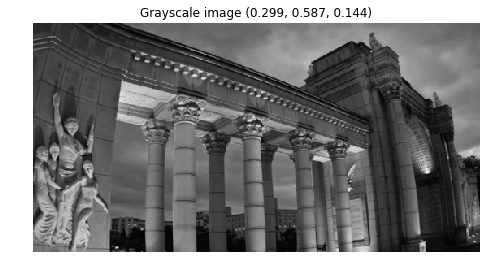

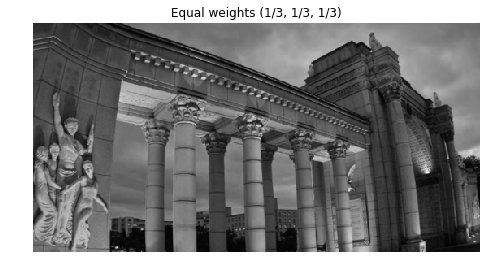

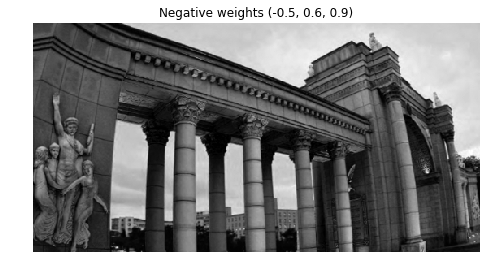

In [0]:
R_channel = khu[:,:,0]
G_channel = khu[:,:,1]
B_channel = khu[:,:,2]
X = 0.299*R_channel + 0.587*G_channel + 0.114*B_channel
X2 = (R_channel + G_channel + B_channel)/3
X3 = - 0.5*R_channel + 0.6*G_channel + 0.9*B_channel

plt.figure(figsize=(8,6))
plt.imshow(X, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale image (0.299, 0.587, 0.144)')
plt.axis('off')
plt.show()
plt.figure(figsize=(8,6))
plt.imshow(X2, cmap='gray', vmin=0, vmax=1)
plt.title('Equal weights (1/3, 1/3, 1/3)')
plt.axis('off')
plt.show()
plt.figure(figsize=(8,6))
plt.imshow(X3, cmap='gray', vmin=0, vmax=1)
plt.title('Negative weights (-0.5, 0.6, 0.9)')
plt.axis('off')
plt.show()

## Gamma correction

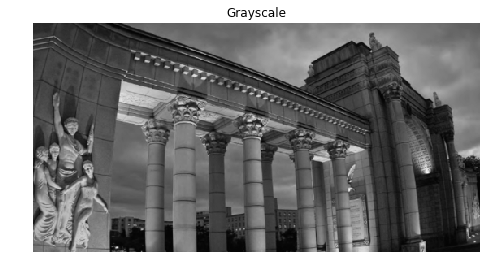

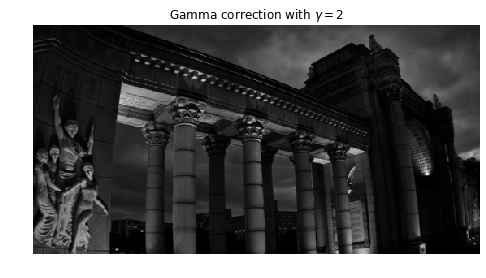

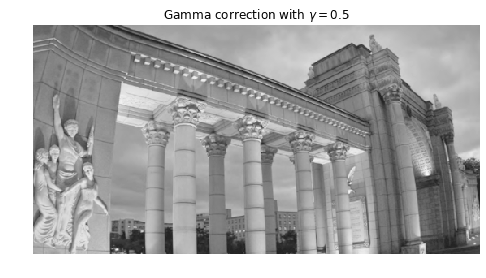

In [0]:
plt.figure(figsize=(8,6))
plt.imshow(X, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(X**2, cmap='gray', vmin=0, vmax=1)
plt.title(r'Gamma correction with $\gamma=2$')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(X**0.5, cmap='gray', vmin=0, vmax=1)
plt.title(r'Gamma correction with $\gamma=0.5$')
plt.axis('off')
plt.show()

## Simple linear transform

Many common operation on image can be represented by linear mapping. For example, 

- RGB to grayscale conversion
- Color correction
- Flipping or stretching
- Blurring
- Resolution changes
- Vertical or horizontal differences


### Negative image:

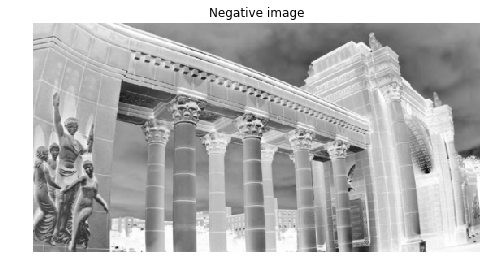

In [0]:
khu_negative = 1 - X

plt.figure(figsize=(8,6))
plt.imshow(khu_negative, cmap='gray')
plt.title('Negative image')
plt.axis('off')
plt.show()

### Scaling and shifting:

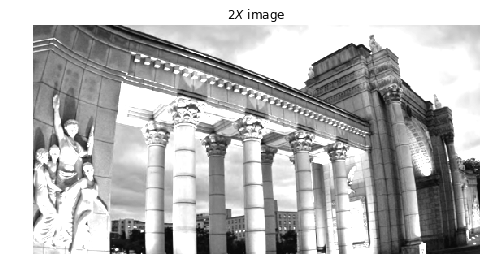

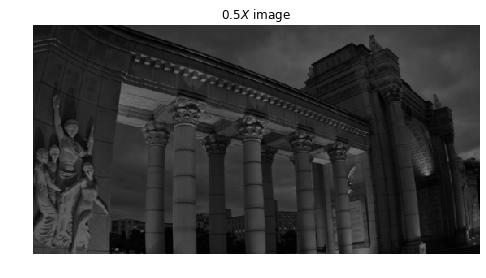

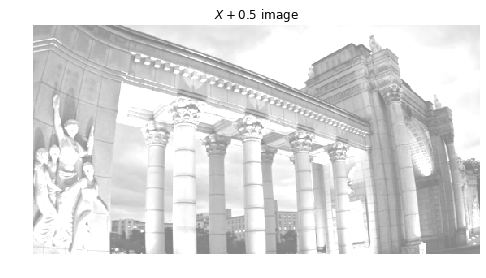

In [0]:
plt.figure(figsize=(8,6))
plt.imshow(X*2, cmap='gray', vmin=0, vmax=1)
plt.title(r'$2X$ image')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(X*0.5, cmap='gray', vmin=0, vmax=1)
plt.title(r'$0.5X$ image')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(X+0.5, cmap='gray', vmin=0, vmax=1)
plt.title(r'$X+0.5$ image')
plt.axis('off')
plt.show()

### Flipping:

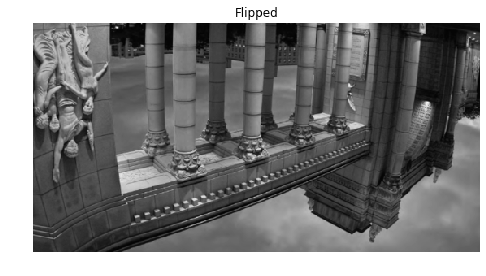

In [0]:
plt.figure(figsize=(8,6))
plt.imshow(X[::-1,:], cmap='gray', vmin=0, vmax=1)
plt.title('Flipped')
plt.axis('off')
plt.show()

### Stretching:

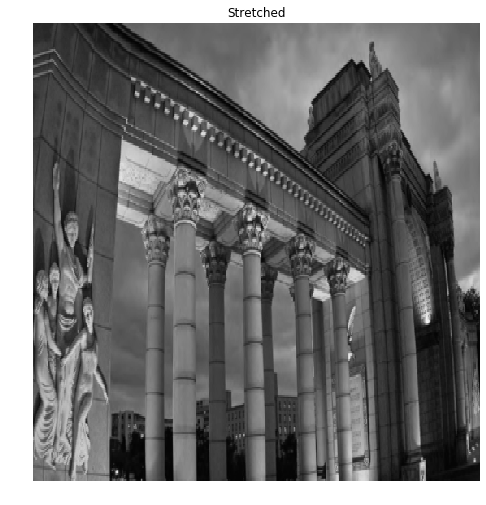

In [0]:
newX = np.zeros((X.shape[0]*2, X.shape[1]))
for i in range(X.shape[0]):
  newX[2*i:2*(i+1),:] = X[i,:]
  
plt.figure(figsize=(8,20))
plt.imshow(newX, cmap='gray', vmin=0, vmax=1)
plt.title('Stretched')
plt.axis('off')
plt.show()

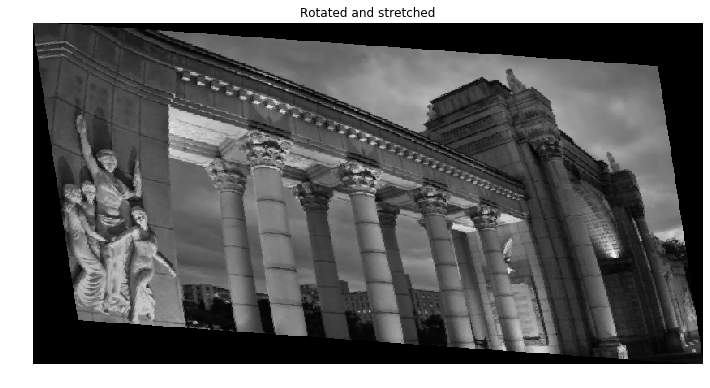

In [0]:
A = np.array([[1.3, 0.1], [0.2, 1.4]])
newX = np.zeros(np.floor(A.dot(X.shape)).astype(int))
A = np.linalg.inv(A)

for i in range(newX.shape[0]):
  for j in range(newX.shape[1]):
    xi, yi = A.dot([i,j])
    xi, yi = int(xi), int(yi)
    if xi>=0 and xi<X.shape[0] and yi>=0 and yi<X.shape[1]:
      newX[i,j] = X[xi,yi]

plt.figure(figsize=(12,9))
plt.imshow(newX, cmap='gray', vmin=0, vmax=1)
plt.title('Rotated and stretched')
plt.axis('off')
plt.show()

### Downsampling:

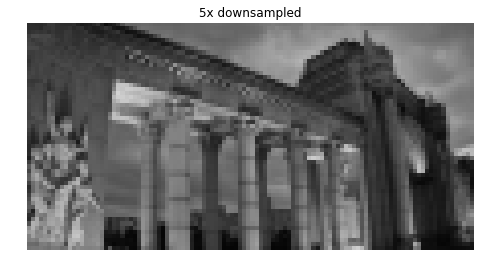

In [0]:
ratio = 5

newX = np.zeros((np.array(X.shape)/ratio).astype(int))

for i in range(newX.shape[0]):
  for j in range(newX.shape[1]):
    newX[i,j] = np.mean(X[ratio*i:ratio*(i+1),ratio*j:ratio*(j+1)])

plt.figure(figsize=(8,6))
plt.imshow(newX, cmap='gray', vmin=0, vmax=1)
plt.title('5x downsampled')
plt.axis('off')
plt.show()



### Blur

Blurring can be represented by 2D convolution.

Suppose we represent image as $m \times n$ matrix $X$, and we represent the blur point spread function as $p \times q$ matrix $B$. Then the blurred image is given by $Y$ with

$$
  Y_{ij} = \sum_{k,l} X_{i−k+1,j−l+1} B_{k,l}
$$

For example, 

$$
  B = \frac{1}{25}\bmat{1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 }
$$

 blurs the imge in both direction.

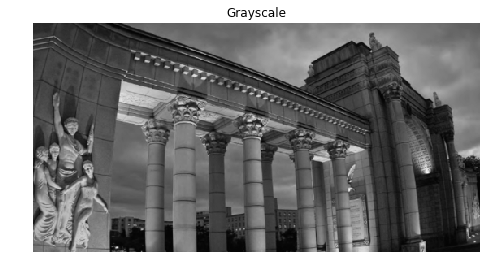

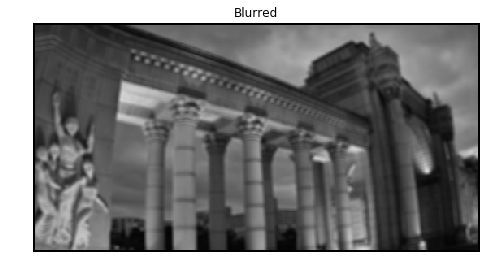

In [0]:
str0 = 2
str1 = 2
B = np.ones((2*str0+1,2*str1+1))
B /= np.sum(B)

newX = np.zeros(X.shape)
for i in range(str0, X.shape[0]-str0):
  for j in range(str1, X.shape[1]-str1):
    newX[i,j] = np.sum(X[i-str0:i+str0+1, j-str1:j+str1+1]*B)
    
plt.figure(figsize=(8,6))
plt.imshow(X, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(newX, cmap='gray', vmin=0, vmax=1)
plt.title('Blurred')
plt.axis('off')
plt.show()

Or, 

$$
  B = \frac{1}{9}\bmat{1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1}
$$

 blurs the imge horizontally.

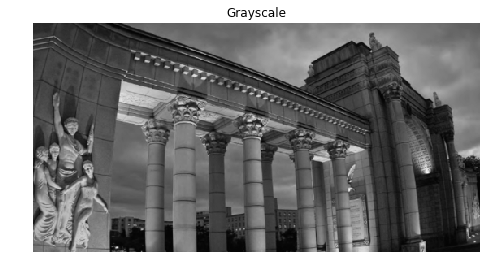

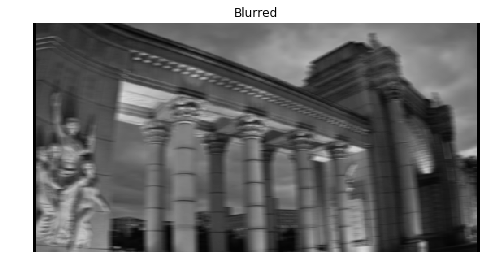

In [0]:
str0 = 0
str1 = 4
B = np.ones((2*str0+1,2*str1+1))
B /= np.sum(B)

newX = np.zeros(X.shape)
for i in range(str0, X.shape[0]-str0):
  for j in range(str1, X.shape[1]-str1):
    newX[i,j] = np.sum(X[i-str0:i+str0+1, j-str1:j+str1+1]*B)
    
plt.figure(figsize=(8,6))
plt.imshow(X, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(newX, cmap='gray', vmin=0, vmax=1)
plt.title('Blurred')
plt.axis('off')
plt.show()

### Difference image

Vertical and horizontal differencing.

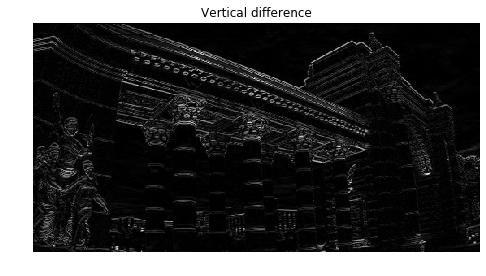

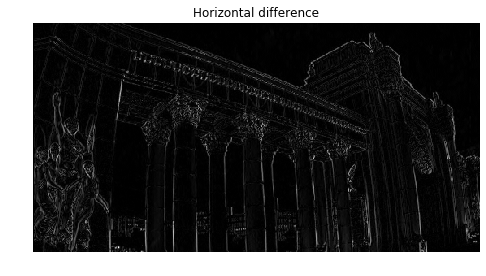

In [0]:
DvX = np.zeros(X.shape)
DhX = np.zeros(X.shape)

for i in range(1, X.shape[0]):
  DvX[i,:] = X[i,:] - X[i-1,:]

for j in range(1, X.shape[1]):
  DhX[:,j] = X[:,j] - X[:,j-1]

plt.figure(figsize=(8,6))
plt.imshow(abs(DvX), cmap='gray')
plt.title('Vertical difference')
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(abs(DhX), cmap='gray')
plt.title('Horizontal difference')
plt.axis('off')
plt.show()